In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [23]:
#Loads the data
games = pd.read_csv("games.csv")

In [24]:
#Print column names in games
print(games.columns)

#Print shape 
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


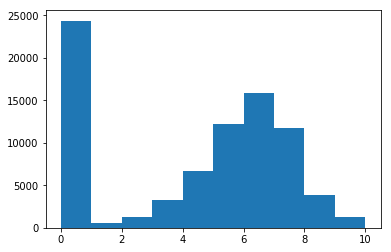

In [25]:
#Histogram of all ratings in average_rating column
plt.hist(games["average_rating"])
plt.show()

In [26]:
#Print first row of all games with zero score
print(games[games["average_rating"] == 0].iloc[0])
#iloc does indexing by position

#Print first row of games with score>0
print(games[games["average_rating"] > 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

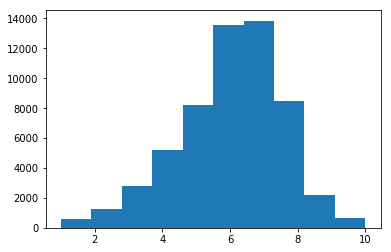

In [27]:
#Remove rows without user review
games = games[games["users_rated"] > 0]

#Remove rows with missing values
games = games.dropna(axis=0)

#Histogram of all the average ratings
plt.hist(games["average_rating"])
plt.show()

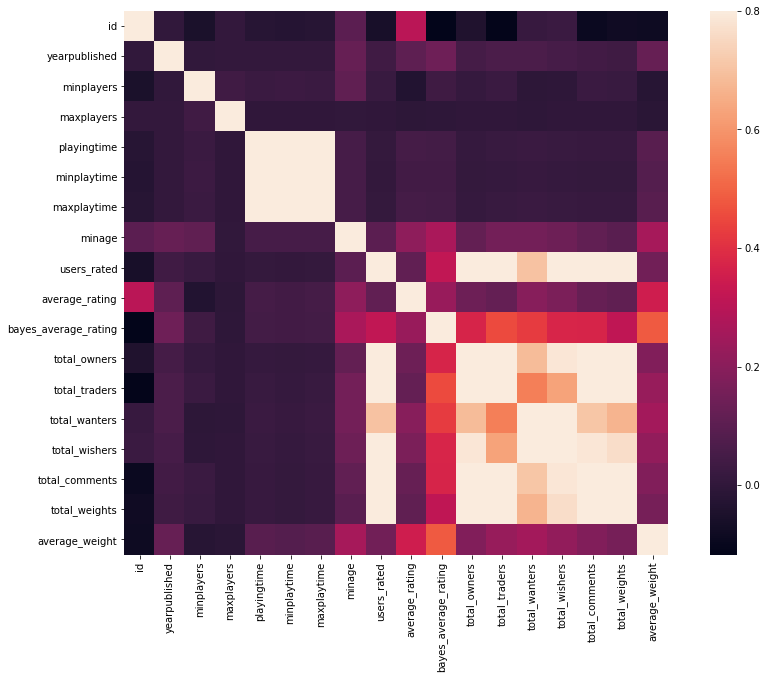

In [28]:
#Correlation matrix
corr_matrix = games.corr()
fig = plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix, vmax = 0.8, square = True)
plt.show()

In [32]:
#Get all the columns
columns = games.columns.tolist()

#Filter the columns to remove unwanted data
columns = [entry for entry in columns if entry not in ["bayes_average_rating","average_rating","type","name","id"]]

#Store the variable we are predicting on
target = "average_rating"

In [33]:
#Generate training set
train = games.sample(frac = 0.8, random_state = 1)

#Testing set
test = games.loc[~games.index.isin(train.index)]

#Shapes of training and testing set
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [34]:
#Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize model class
line_reg = LinearRegression()

#Fit the training data
line_reg.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
#Predictions for test data
prediction = line_reg.predict(test[columns])

#Compute error between test predictions and actual values
mean_squared_error(prediction,test[target])

2.0788190326293243

In [38]:
#Import random forest model
from sklearn.ensemble import RandomForestRegressor

#Initialize model
rf_reg = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#Fit the data
rf_reg.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
#Predictions 
prediction = rf_reg.predict(test[columns])

#Compute error between predictions and actual values
mean_squared_error(prediction,test[target])

1.4458564605687358

In [41]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [42]:
#Predictions with both the models
rating_lr = line_reg.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_rfr = rf_reg.predict(test[columns].iloc[0].values.reshape(1,-1))

#Print predictions
print(rating_lr)
print(rating_rfr)

[8.12061283]
[7.91373581]


In [43]:
test[target].iloc[0]

8.07933